## Import libraries

In [33]:
import pandas as pd
import numpy as np
from google.colab import drive

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,\
        accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,GradientBoostingClassifier,StackingClassifier,ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from time import time
from datetime import timedelta

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

sns.set()


In [34]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    pred = pd.Series(pred)
    true = pd.Series(true)
    
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

def compute_metrics(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    f1_score_1 = f1_score(y_true,y_pred,average='binary',pos_label=1)
    f1_score_0 = f1_score(y_true,y_pred,average='binary',pos_label=0)
    f1_score_macro = f1_score(y_true,y_pred,average='macro')
    return [accuracy,f1_score_1,f1_score_0,f1_score_macro]
    
    

results = pd.DataFrame(columns=['Accuracy', 'F1-score (class 1)', 'F1-score (class 0)', 'F1-score (macro avg)'])

## Load dataset

In [35]:
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/ML/Machine Learning Project. GALINDO - PAGLIA/kickafterpreprocess.csv', sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Datos categoricos

In [36]:
df = df.drop(columns=['VehicleAge','VehOdo','VehBCost','WarrantyCost'])
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,drop_first=True)

In [37]:
df

,IsBadBuy,Auction_MANHEIM,Auction_OTHER,SubModel_COUPE,SubModel_CUV,SubModel_MINIVAN,SubModel_OTHER,SubModel_PASSENGER,SubModel_SEDAN,SubModel_SPORT,...,age_cat_6to9_years,VehOdo_cat_61815-73322,VehOdo_cat_73322-82383,VehOdo_cat_>82383,VehBCost_cat_5440-6710,VehBCost_cat_6710-7900,VehBCost_cat_>7900,WarrantyCost_cat_1155-1623,WarrantyCost_cat_837-1155,WarrantyCost_cat_>1623
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
69728,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
69729,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
69730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [38]:
from sklearn.model_selection import train_test_split
y=df['IsBadBuy']
X=df.drop(columns='IsBadBuy')
X_learn, X_test, y_learn, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
X_train, X_val, y_train, y_val = train_test_split(X_learn, y_learn, test_size=0.20, random_state=2022)

In [39]:
model_DT_cat =DecisionTreeClassifier(criterion = 'gini', max_depth=None, min_samples_split = 2, min_samples_leaf = 1, max_features = 'log2', random_state= 2022)

model_DT_cat_fit=model_DT_cat.fit(X_train,y_train)
y_pred=model_DT_cat_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['DT-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)

predicted,0,1
target,,
0,9159,908
1,963,127


In [40]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.90      0.91      0.91     10067
         yes       0.12      0.12      0.12      1090

    accuracy                           0.83     11157
   macro avg       0.51      0.51      0.51     11157
weighted avg       0.83      0.83      0.83     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.832303,0.119529,0.907326,0.513428


In [41]:
model_RF_cat =RandomForestClassifier(n_estimators = 100,criterion = 'gini', max_depth=20, min_samples_split = 9, min_samples_leaf = 4, max_features = None, random_state= 2022 )

model_RF_cat_fit=model_RF_cat.fit(X_train,y_train)
y_pred=model_RF_cat_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['RF-best',:] = compute_metrics(y_val, y_pred)

confusion(y_val, y_pred)



predicted,0,1
target,,
0,10062,5
1,1085,5


In [42]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.90      1.00      0.95     10067
         yes       0.50      0.00      0.01      1090

    accuracy                           0.90     11157
   macro avg       0.70      0.50      0.48     11157
weighted avg       0.86      0.90      0.86     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.832303,0.119529,0.907326,0.513428
RF-best,0.902303,0.009091,0.948619,0.478855


In [43]:
model_SVM_cat=SVC(C=0.125, gamma= 0.000125, kernel='linear', random_state=42, class_weight='balanced')

model_SVM_cat_fit=model_SVM_cat.fit(X_train,y_train)
y_pred=model_SVM_cat_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['SVM-best',:] = compute_metrics(y_val, y_pred)

In [44]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.95      0.40      0.56     10067
         yes       0.13      0.80      0.22      1090

    accuracy                           0.44     11157
   macro avg       0.54      0.60      0.39     11157
weighted avg       0.87      0.44      0.53     11157



,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.832303,0.119529,0.907326,0.513428
RF-best,0.902303,0.009091,0.948619,0.478855
SVM-best,0.438559,0.217587,0.562203,0.389895


In [45]:
model_LR_cat =LogisticRegression(penalty = 'l2', C = 0.001, solver = 'lbfgs', max_iter = 1000, random_state= 2022)

model_LR_cat_fit=model_LR_cat.fit(X_train,y_train)
y_pred=model_LR_cat_fit.predict(X_val)
compute_metrics(y_val, y_pred)
results.loc['LR-best',:] = compute_metrics(y_val, y_pred)

In [46]:
print(classification_report(y_val,
                            y_pred,
                            target_names=['no', 'yes'],))

results

              precision    recall  f1-score   support

          no       0.90      1.00      0.95     10067
         yes       0.00      0.00      0.00      1090

    accuracy                           0.90     11157
   macro avg       0.45      0.50      0.47     11157
weighted avg       0.81      0.90      0.86     11157



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,F1-score (class 1),F1-score (class 0),F1-score (macro avg)
DT-best,0.832303,0.119529,0.907326,0.513428
RF-best,0.902303,0.009091,0.948619,0.478855
SVM-best,0.438559,0.217587,0.562203,0.389895
LR-best,0.902303,0.0,0.948643,0.474322


## Final metrics

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [56]:
y_pred = model_RF_cat.predict(X_train)

print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     40296
           1       0.97      0.03      0.07      4332

    accuracy                           0.91     44628
   macro avg       0.94      0.52      0.51     44628
weighted avg       0.91      0.91      0.86     44628



In [57]:
y_final_pred = model_RF_cat.predict(X_test)

print(classification_report(y_test,y_final_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12637
           1       0.17      0.00      0.00      1310

    accuracy                           0.91     13947
   macro avg       0.54      0.50      0.48     13947
weighted avg       0.84      0.91      0.86     13947



In [59]:
cm = metrics.confusion_matrix(y_test, y_final_pred)

In [60]:
score = model_RF_cat.score(X_test, y_test)
print(score)

0.9054993905499391


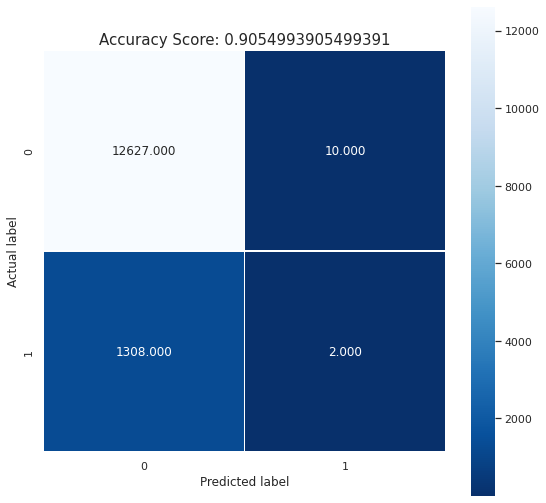

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);